# ECH EXPLORATORY DATA ANALISYS

The objective of this project is to use the continuous household survey ECH to obtain population indicators and to analyze the relationships between the deciles and the different variables. 
We divided the project in two: a first part to analyze the whole dataframe and a second part where subdataframes were created with the information to be analyzed.

# We import packages and tools:

In [268]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib import style

plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 4)

We will start the analysis by loading the ECH 2022 and processing a bit of the base dataset for further analysis:

In [269]:
# Load data
dfch = pd.read_csv(
    r'C:\Users\andre\Desktop\Scripts\NOTEBOOKS\ECH_2022\DATA\ECH_2022.csv'
)

dfch.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_21300\1497389803.py:2: DtypeWarning: Columns (84,179,278) have mixed types. Specify dtype option on import or set low_memory=False.
  dfch = pd.read_csv(


,ID,nper,anio,mes,GR,region,region_4,dpto,ccz,secc,...,w_tri,w_sem,estred13,nom_dpto,g260,g261,g261_1,w_ano,Loc_agr_13,Nom_loc_agr_13
0,11558,1,2022,1,7,1,1,1,1,4,...,175,87.5,4,MONTEVIDEO,NaN,NaN,NaN,38,1010,Montevideo
1,11559,1,2022,1,7,1,1,1,1,4,...,350,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo
2,11559,2,2022,1,7,1,1,1,1,4,...,350,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo
3,11560,1,2022,1,7,1,1,1,1,4,...,131,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo
4,11561,1,2022,1,7,1,1,1,1,4,...,131,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo


In [270]:
dfch['nom_dpto'] = dfch['nom_dpto'].str.upper()
dfch['nom_dpto'].unique()

array(['MONTEVIDEO', 'ARTIGAS', 'CANELONES', 'CERRO LARGO', 'COLONIA',
       'DURAZNO', 'FLORES', 'FLORIDA', 'LAVALLEJA', 'MALDONADO',
       'PAYSANDU', 'RIO NEGRO', 'RIVERA', 'ROCHA', 'SALTO', 'SAN JOSE',
       'SORIANO', 'TACUAREMBO', 'TREINTA Y TRES', 'PAYSANDÚ', 'RÍO NEGRO',
       'SAN JOSÉ', 'TACUAREMBÓ'], dtype=object)

In [271]:
dfch['nom_dpto'] = dfch['nom_dpto'].str.replace('SAN JOSE', 'SAN JOSÉ')
dfch['nom_dpto'] = dfch['nom_dpto'].str.replace('TACUAREMBO', 'TACUAREMBÓ')
dfch['nom_dpto'] = dfch['nom_dpto'].str.replace('PAYSANDU', 'PAYSANDÚ')
dfch['nom_dpto'] = dfch['nom_dpto'].str.replace('RIO NEGRO', 'RÍO NEGRO')
dfch['nom_dpto'].unique()

array(['MONTEVIDEO', 'ARTIGAS', 'CANELONES', 'CERRO LARGO', 'COLONIA',
       'DURAZNO', 'FLORES', 'FLORIDA', 'LAVALLEJA', 'MALDONADO',
       'PAYSANDÚ', 'RÍO NEGRO', 'RIVERA', 'ROCHA', 'SALTO', 'SAN JOSÉ',
       'SORIANO', 'TACUAREMBÓ', 'TREINTA Y TRES'], dtype=object)

# Analysis:
First we will look at how income is distributed in the data collected in the survey.

Second, we choose to divide the dataset into deciles based on the income reported in the survey and then perform a descriptive analysis of the lowest and highest decile in principle.

Finally, we will incorporate other variables such as education or the expenditure profile of the ECH families/individuals.

## First we will see how the income values are distributed in our dataset:

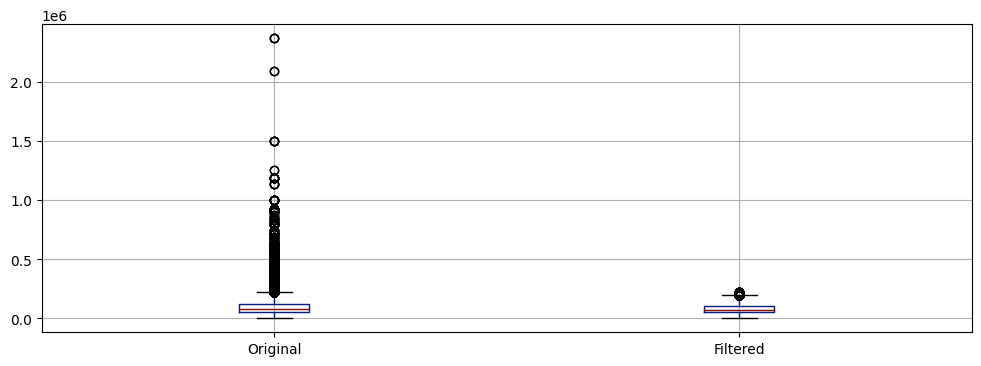

In [272]:
# We calculate the interquartile range (IR):
Q1 = dfch['ht11'].quantile(0.25)
Q3 = dfch['ht11'].quantile(0.75)
IQR = Q3 - Q1

# We define the lower bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# We filter out the atypical data:
dfch_filtered = dfch[(dfch['ht11'] >= lower_bound) & (dfch['ht11'] <= upper_bound)]

# We create a new dataframe with the filtered and unfiltered data (atypical data):
data = pd.DataFrame({'Original': dfch['ht11'], 'Filtered': dfch_filtered['ht11']})

# We create a boxplot for each dataframe:
data.boxplot()

plt.show()

As we can observe that the income distribution of our dataset has many outliers (outliers are "extreme" values, far away from the mean income of the ECH).
In the example code above we calculate the quartiles and filter out the values that exceed the limits we set (statistically it is always +/- 1.5 multiplied by the interquartile range). For graphical convenience what we will do is to filter these values from the graph and keep only the box and the "whiskers":

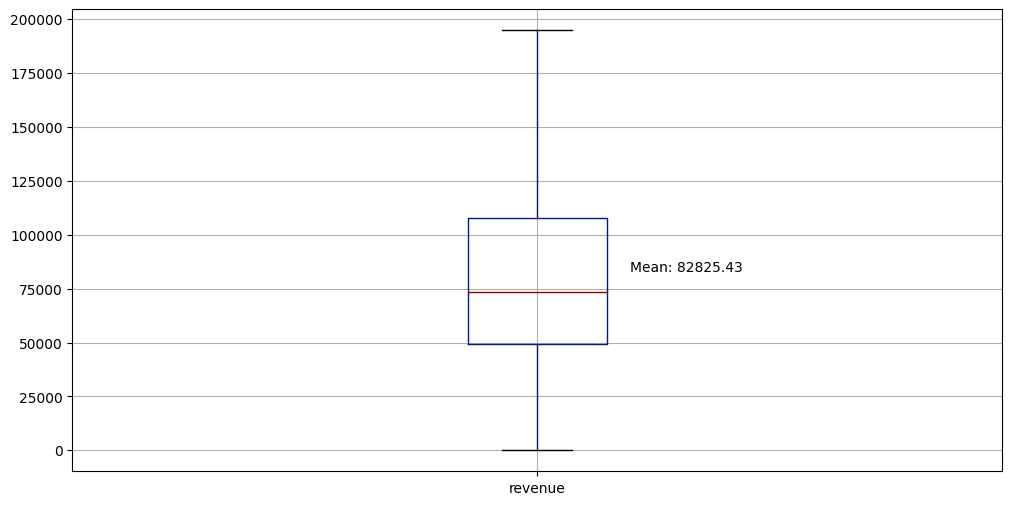

In [273]:
# We set the graph configuration:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 6)

# We calculate the RI:
Q1 = dfch['ht11'].quantile(0.25)
Q3 = dfch['ht11'].quantile(0.75)
IQR = Q3 - Q1

# We define upper and lower bounds to filter out atypical data:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# We filter out the atypical data:
dfch_filtered = dfch[(dfch['ht11'] >= lower_bound) & (dfch['ht11'] <= upper_bound)]

# We create our boxplot without atypical data:
dfch_filtered.boxplot(column='ht11', showfliers=False)

# We set labels
plt.xticks([1], ['revenue'])

# We calculate the mean of the filtered values:
mean_value = dfch_filtered['ht11'].mean()

# We add a note with the mean value:
plt.text(1.1, mean_value, f'Mean: {mean_value:.2f}')

plt.show()


In [274]:
min_i = dfch['ht11'].min()
mean_i = dfch['ht11'].mean()
max_i = dfch['ht11'].max()

print(f"The minimum income of the ECH is: {min_i}, while the mean is: {mean_i} and the maximum value: {max_i}")


The minimum income of the ECH is: 0.0, while the mean is: 98380.48681443256 and the maximum value: 2366721.1


As we can see, the average income without outliers is very close to 83,000 UYU while if we analyze the average of the whole ECH it is closer to 100,000 UYU. This is because the extreme values "pull" up the average value.

In the next sections we will go deeper into how income is distributed with respect to various variables.

## Second, we will generate the deciles and then cross-reference the income per decile with other variables:

In [275]:
# First we define a function to generate deciles as we need, we have interesting to have more options to group people beside the income. This can be useful later.

def decile(df, index, col, n):
    
    # This function takes as arguments the dataframe, the desire index of our dataframe, the column choosen to calculate the partitions (In this case will be deciles) and the number of partitions. 
    
    df.sort_values(by=col, ascending=True, inplace=True)
    df['decile'] = pd.qcut(df[col], n, labels=False) + 1
    df['decile'] = df['decile'].astype(int)
    
    df.sort_values(by= index, ascending=True, inplace=True)
    
    return df

decile(dfch, 'ID', 'ht11', 10)

dfch.reset_index()

,index,ID,nper,anio,mes,GR,region,region_4,dpto,ccz,...,w_sem,estred13,nom_dpto,g260,g261,g261_1,w_ano,Loc_agr_13,Nom_loc_agr_13,decile
0,0,11558,1,2022,1,7,1,1,1,1,...,87.5,4,MONTEVIDEO,NaN,NaN,NaN,38,1010,Montevideo,4
1,1,11559,1,2022,1,7,1,1,1,1,...,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo,9
2,2,11559,2,2022,1,7,1,1,1,1,...,175.0,4,MONTEVIDEO,NaN,NaN,NaN,84,1010,Montevideo,9
3,3,11560,1,2022,1,7,1,1,1,1,...,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo,10
4,4,11561,1,2022,1,7,1,1,1,1,...,65.5,4,MONTEVIDEO,NaN,NaN,NaN,33,1010,Montevideo,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55051,55051,34502,1,2022,12,18,3,3,19,0,...,93.0,7,TREINTA Y TRES,0.0,0.0,0.0,48,31000,Agrupación localidades menores a 5.000 habitan...,3
55052,55052,34502,2,2022,12,18,3,3,19,0,...,93.0,7,TREINTA Y TRES,0.0,0.0,0.0,48,31000,Agrupación localidades menores a 5.000 habitan...,3
55053,55055,34503,3,2022,12,18,3,3,19,0,...,124.0,7,TREINTA Y TRES,0.0,0.0,0.0,63,31000,Agrupación localidades menores a 5.000 habitan...,4
55054,55054,34503,2,2022,12,18,3,3,19,0,...,124.0,7,TREINTA Y TRES,0.0,0.0,0.0,63,31000,Agrupación localidades menores a 5.000 habitan...,4


In [276]:
print(f"The count of homes that were censed was: {dfch['ID'].count()}. And {dfch['nper'].sum()} persons were registered.")

The count of homes that were censed was: 55056. And 114567 persons were registered.


The number of records in the dataset refers to the number of households in the ECH, the 'ID' field is the household surveyed while the 'nper' field is the persons surveyed within that household. It is interesting to see how the distribution of households surveyed in the ECH by decile looks like:

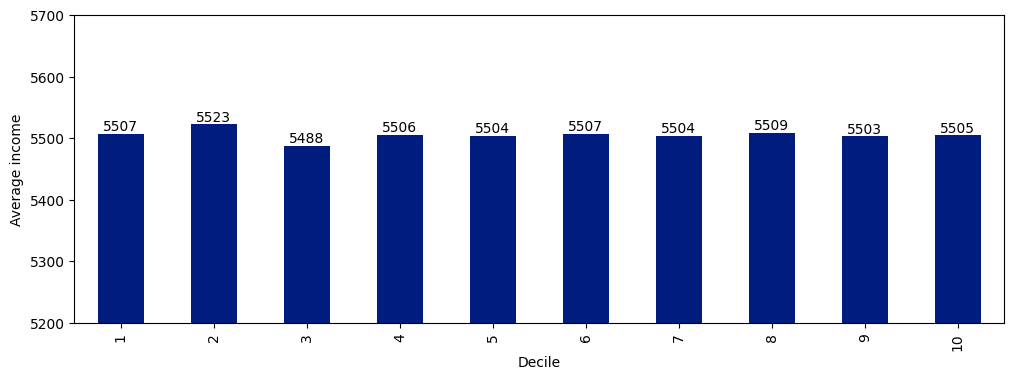

In [277]:
# We set the graph configuration:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 4)

# We count the number of people in each defined decile:
dfch_count = dfch.groupby('decile')['ht11'].count()
ax = dfch_count.plot.bar()

# We add labels to each decile:
for i in ax.containers:
    ax.bar_label(i)

# Set upper and lower y-axis limits:
ax.set_ylim(bottom=5200, top=5700)

# Set axis labels:
plt.xlabel('Decile')
plt.ylabel('Average income')

# Show the plot
plt.show()

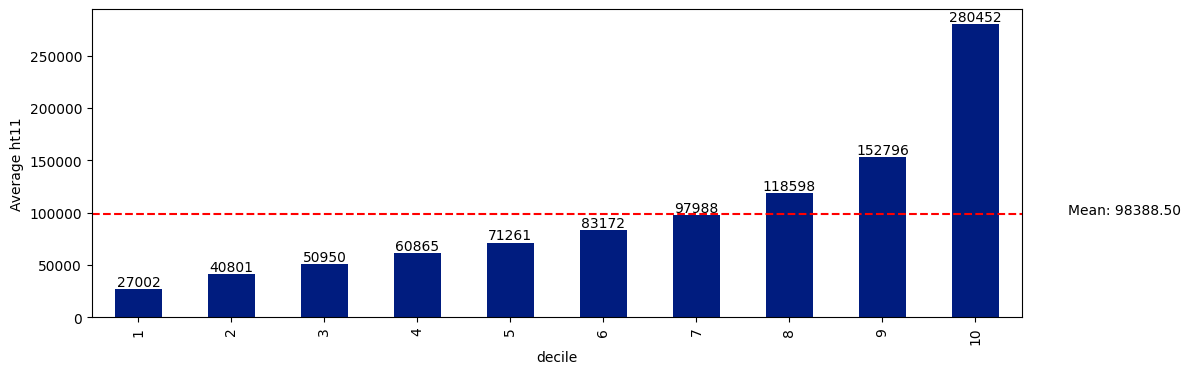

In [278]:
# Now we can define a function for plot the deciles and the mean values of each column that we can pick of the dataframe.

def plot_average(df, col, variable):
    
    # This function taks for arguments a dataframe, the name of the column/variable were we need calculate and plot the mean and a column with deciles or segments to plot and group the mean.
    
    df[col] = df[col].astype(float)
    df_decile = df.groupby(variable)[col].mean().round()
    
    ax = df_decile.plot.bar()
    ax.axhline(df_decile.mean(), color='r', linestyle='--')
    
    for i in ax.containers:
        ax.bar_label(i)
    mean_value = df_decile.mean()
    
    plt.text(len(df_decile), mean_value, f'Mean: {mean_value:.2f}')
    plt.xlabel(variable)
    plt.ylabel(f'Average {col}')
    plt.show()

plot_average(dfch, 'ht11', 'decile')

## Income distribution by departments:

In this section we will see how income is distributed in the country's departments. We will take the data grouped by department and discuss according to the results found.

In [279]:
# We analyze the distribution of mean income by department by defining a subset of grouped data:
mean_income = dfch.groupby('nom_dpto')['ht11'].mean().round(2)

# Ascending order by mean income
print(mean_income.sort_values())

nom_dpto
ARTIGAS            62875.43
TACUAREMBÓ         64359.40
CERRO LARGO        65575.97
TREINTA Y TRES     66128.62
RIVERA             67714.15
ROCHA              69058.03
LAVALLEJA          69604.95
DURAZNO            69855.41
FLORIDA            73779.11
PAYSANDÚ           77534.44
RÍO NEGRO          80897.90
FLORES             82540.57
COLONIA            82631.21
MALDONADO          84139.45
SAN JOSÉ           84484.81
SORIANO            89319.99
SALTO              91812.03
CANELONES         101045.26
MONTEVIDEO        126102.68
Name: ht11, dtype: float64


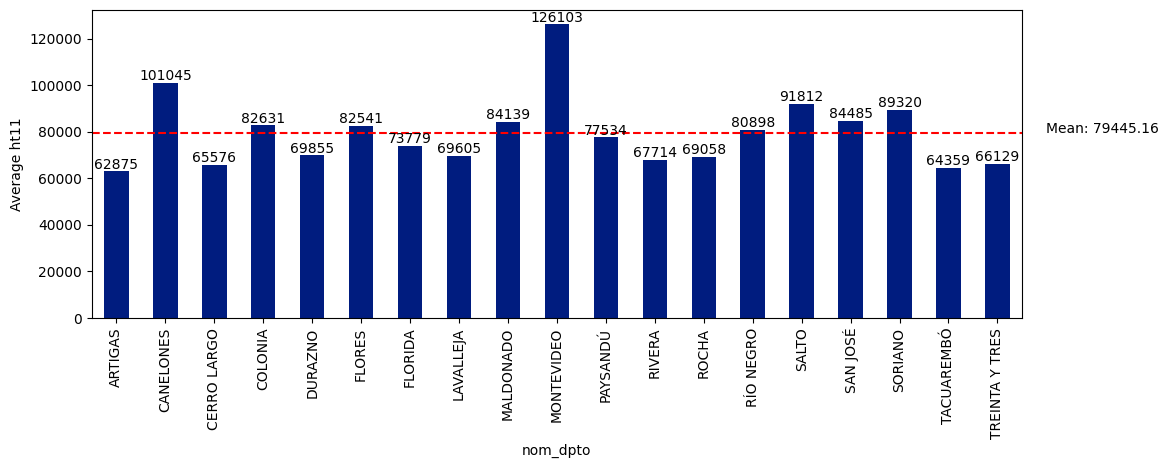

In [280]:
plot_average(dfch, 'ht11', 'nom_dpto')

C:\Users\andre\AppData\Local\Temp\ipykernel_21300\3861510332.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_values))


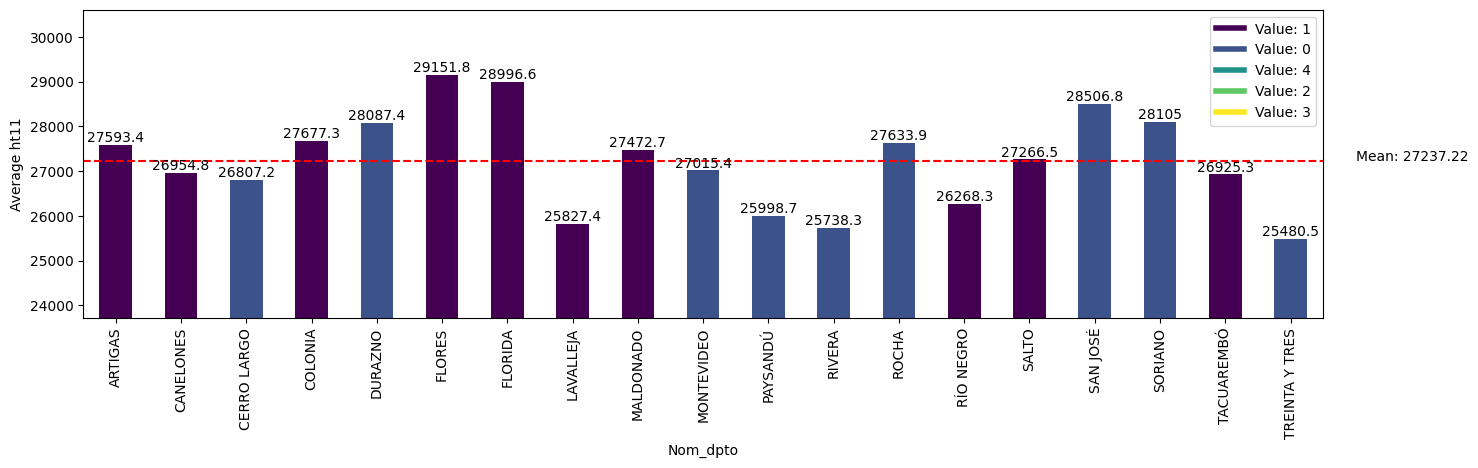

In [281]:
# Primero seteamos parametros para el grafico:
plt.rcParams["figure.figsize"] = (16, 4)

# Definimos un subconjunto de datos para el quintil mas pobre:
poor_people = dfch[dfch['decile'] == 1]

def plot_map_average(df, col, groupby_col, color_col):
    
    df_grouped = df.groupby(groupby_col)[col].mean()
    unique_values = df[color_col].unique()
    
    cmap = plt.cm.get_cmap('viridis', len(unique_values))
    value_to_color = {value: cmap(i) for i, value in enumerate(unique_values)}
    colors = df[color_col].map(value_to_color)
    
    ax = df_grouped.plot.bar(color=colors)
    ax.axhline(df_grouped.mean(), color='r', linestyle='--')
    
    for i in ax.containers:
        ax.bar_label(i)
    legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'Value: {value}') for value, color in value_to_color.items()]
    ax.legend(handles=legend_elements, loc='upper right')
    
    mean_value = df_grouped.mean()
    min_value = df_grouped.min()
    plt.text(len(df_grouped), mean_value, f'Mean: {mean_value:.2f}')
    
    ax.set_ylim(bottom= ((min_value - mean_value) + min_value))
    plt.xlabel(groupby_col.capitalize())
    plt.ylabel(f'Average {col}')
    plt.show()
    

plot_map_average(poor_people, 'ht11', 'nom_dpto', 'f70')

In this graph we can see what is the average income for the lowest decile of the population of our country. At a glance we have 9 departments that have incomes on average lower than the average of the total decile, being the one with the lowest average income Rio Negro and the highest Flores.

Additionally we can see what is the employment situation of the lowest decile in each department, the field: 'f70' is a variable defined as the amount of work/s that people have. In the graph we can see that people have 1 or 0 jobs, where in the case of the value 0 we could infer that they do not have a stable formal job but are employed informally.

C:\Users\andre\AppData\Local\Temp\ipykernel_21300\3861510332.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_values))


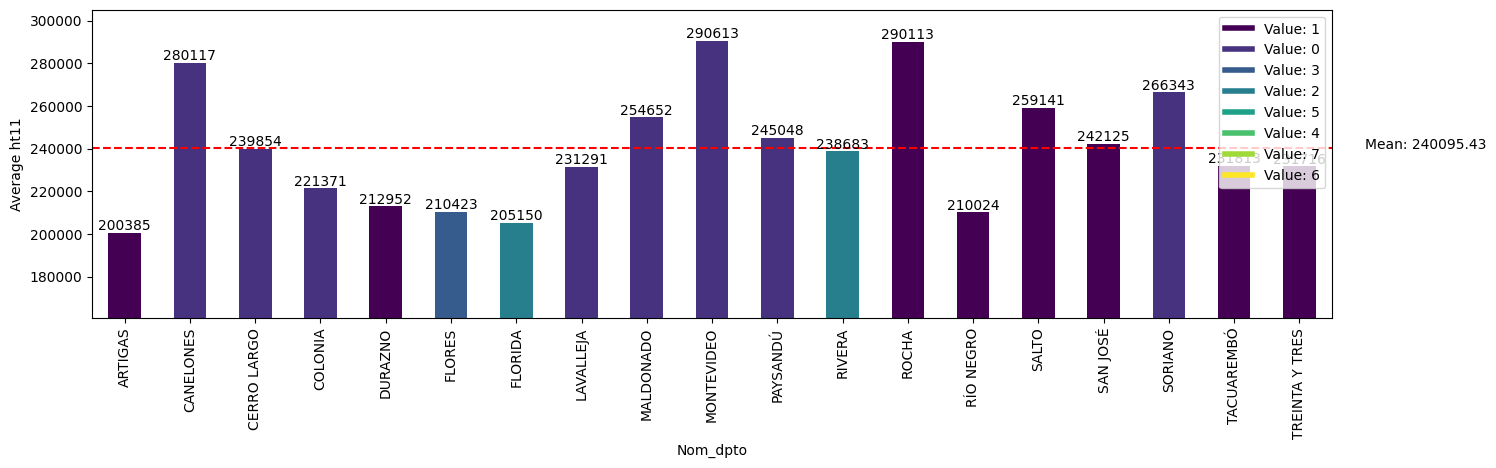

In [282]:
# Definimos un subconjunto de datos para el decil mas rico:
rich_people = dfch[dfch['decile'] == 10]

plot_map_average(rich_people, 'ht11', 'nom_dpto', 'f70')

When we analyze the highest decile and the amount of work people have, we can observe that they have 1 to 3 jobs.

## We define variables referring to the level of education by decile:
In this section we will analyze the behavior of income by deciles and educational levels attained.

In [283]:
# We define a subset of data:
df_ed = pd.DataFrame(
    dfch,
    columns= [
        'ID',
        'nper',
        'anio',
        'mes',
        'nom_dpto',
        'decile',
        'ht11',
        'e197_1',
        'e201_1a',
        'e201_1c',
        'e201_1d', 
        'e218_1',
        'e221_1',
        'e224_1'
    ]
)

# We define the new names
ed_columns = ['ID',
    'nper',
    'year',
    'month',
    'dept_name',
    'decile',
    'income',
    'edprim',
    'edcbas',
    'edbachill',
    'edutu',
    'edtuniv',
    'edtnouniv',
    'edtercpos']

# We define the old names
columns= [
    'ID',
    'nper',
    'anio',
    'mes',
    'nom_dpto',
    'd_1',
    'ht11',
    'e197_1',
    'e201_1a',
    'e201_1c',
    'e201_1d',
    'e218_1',
    'e221_1',
    'e224_1'
]

#Create a dictionary that maps the old and new names:
column_mapping = dict(zip(columns, ed_columns))

# We rename the columns of the data subset:
df_ed = df_ed.rename(columns=column_mapping)

df_ed.head()

,ID,nper,year,month,dept_name,decile,income,edprim,edcbas,edbachill,edutu,edtuniv,edtnouniv,edtercpos
0,11558,1,2022,1,MONTEVIDEO,4,63189.480000,1,1,1,0,2,0,0
1,11559,1,2022,1,MONTEVIDEO,9,150378.960000,1,1,1,0,2,0,0
2,11559,2,2022,1,MONTEVIDEO,9,150378.960000,1,1,1,0,0,0,0
3,11560,1,2022,1,MONTEVIDEO,10,198606.146667,1,1,2,0,0,0,0
4,11561,1,2022,1,MONTEVIDEO,8,113189.480000,1,1,1,0,1,0,0


First, we will analyze the distribution of educational levels attained by people in the ECH:

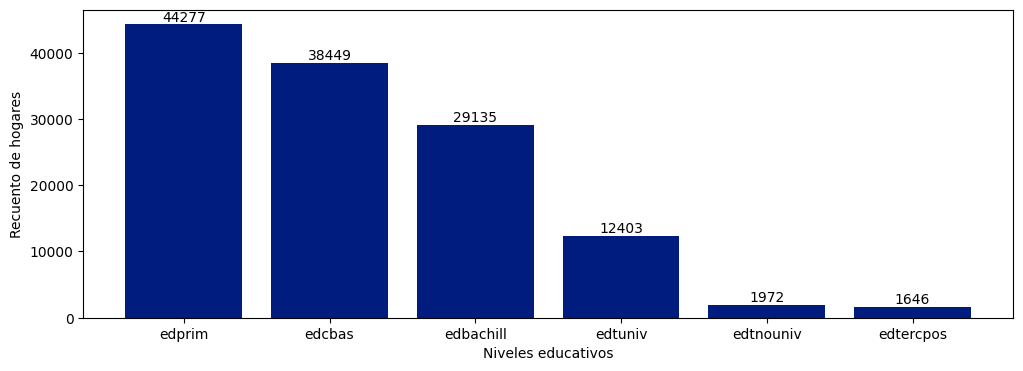

In [284]:
# Setting plot parameters:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 4)

# First we filter the columns of each education level equal 1 because that means the people censed on that home has achived the level descripted on each column:
mask = (df_ed['edprim'] == 1) | (df_ed['edcbas'] == 1) | (df_ed['edbachill'] == 1) | (df_ed['edutu'] == 1) | (df_ed['edtuniv'] == 1) | (df_ed['edtnouniv'] == 1) | (df_ed['edtercpos'] == 1)
filtered_df = df_ed[mask]

# Now we count the numer of ID's on each level achieved:
cols = ['edprim', 'edcbas', 'edbachill', 'edtuniv', 'edtnouniv', 'edtercpos']
counts = [filtered_df[col].sum() for col in cols]

# Plot the counts
plt.bar(cols, counts)
plt.xlabel('Niveles educativos')
plt.ylabel('Recuento de hogares')

# Add labels
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

As we can see from the count of households by level of education attained, as we advance in terms of educational levels, we have fewer and fewer people in the professional, professional-higher education levels.

Now we will observe what happens in the case of primary education, how many households actually attain primary education by department:

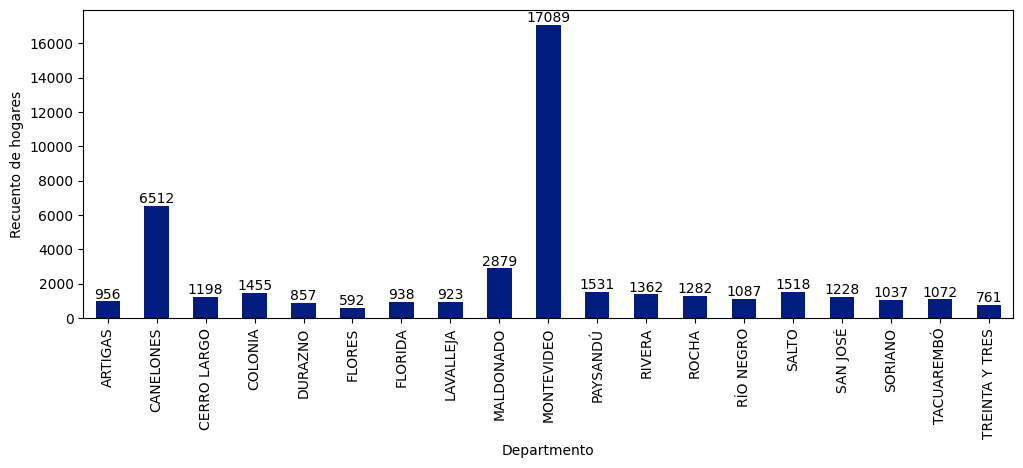

In [285]:
# Apply some filters
mask = df_ed['edprim'] == 1
filtered_df = df_ed[mask]

# Now must count the number of houses by department that has achived primary school education completed.
counts = filtered_df.groupby('dept_name')['ID'].count()

# Plot the results:
counts.plot(kind='bar')
plt.xlabel('Departmento')
plt.ylabel('Recuento de hogares')

# Add labels
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In this graph we can see a great difference between primary education in Montevideo with respect to the interior departments. In particular, if we consider the interior without Canelones we see that Maldonado is the department with the highest level after Canelones, leaving the rest of the interior at lower levels in terms of households with complete primary education.

Now we will see the distribution of households by decile according to the level of education attained:

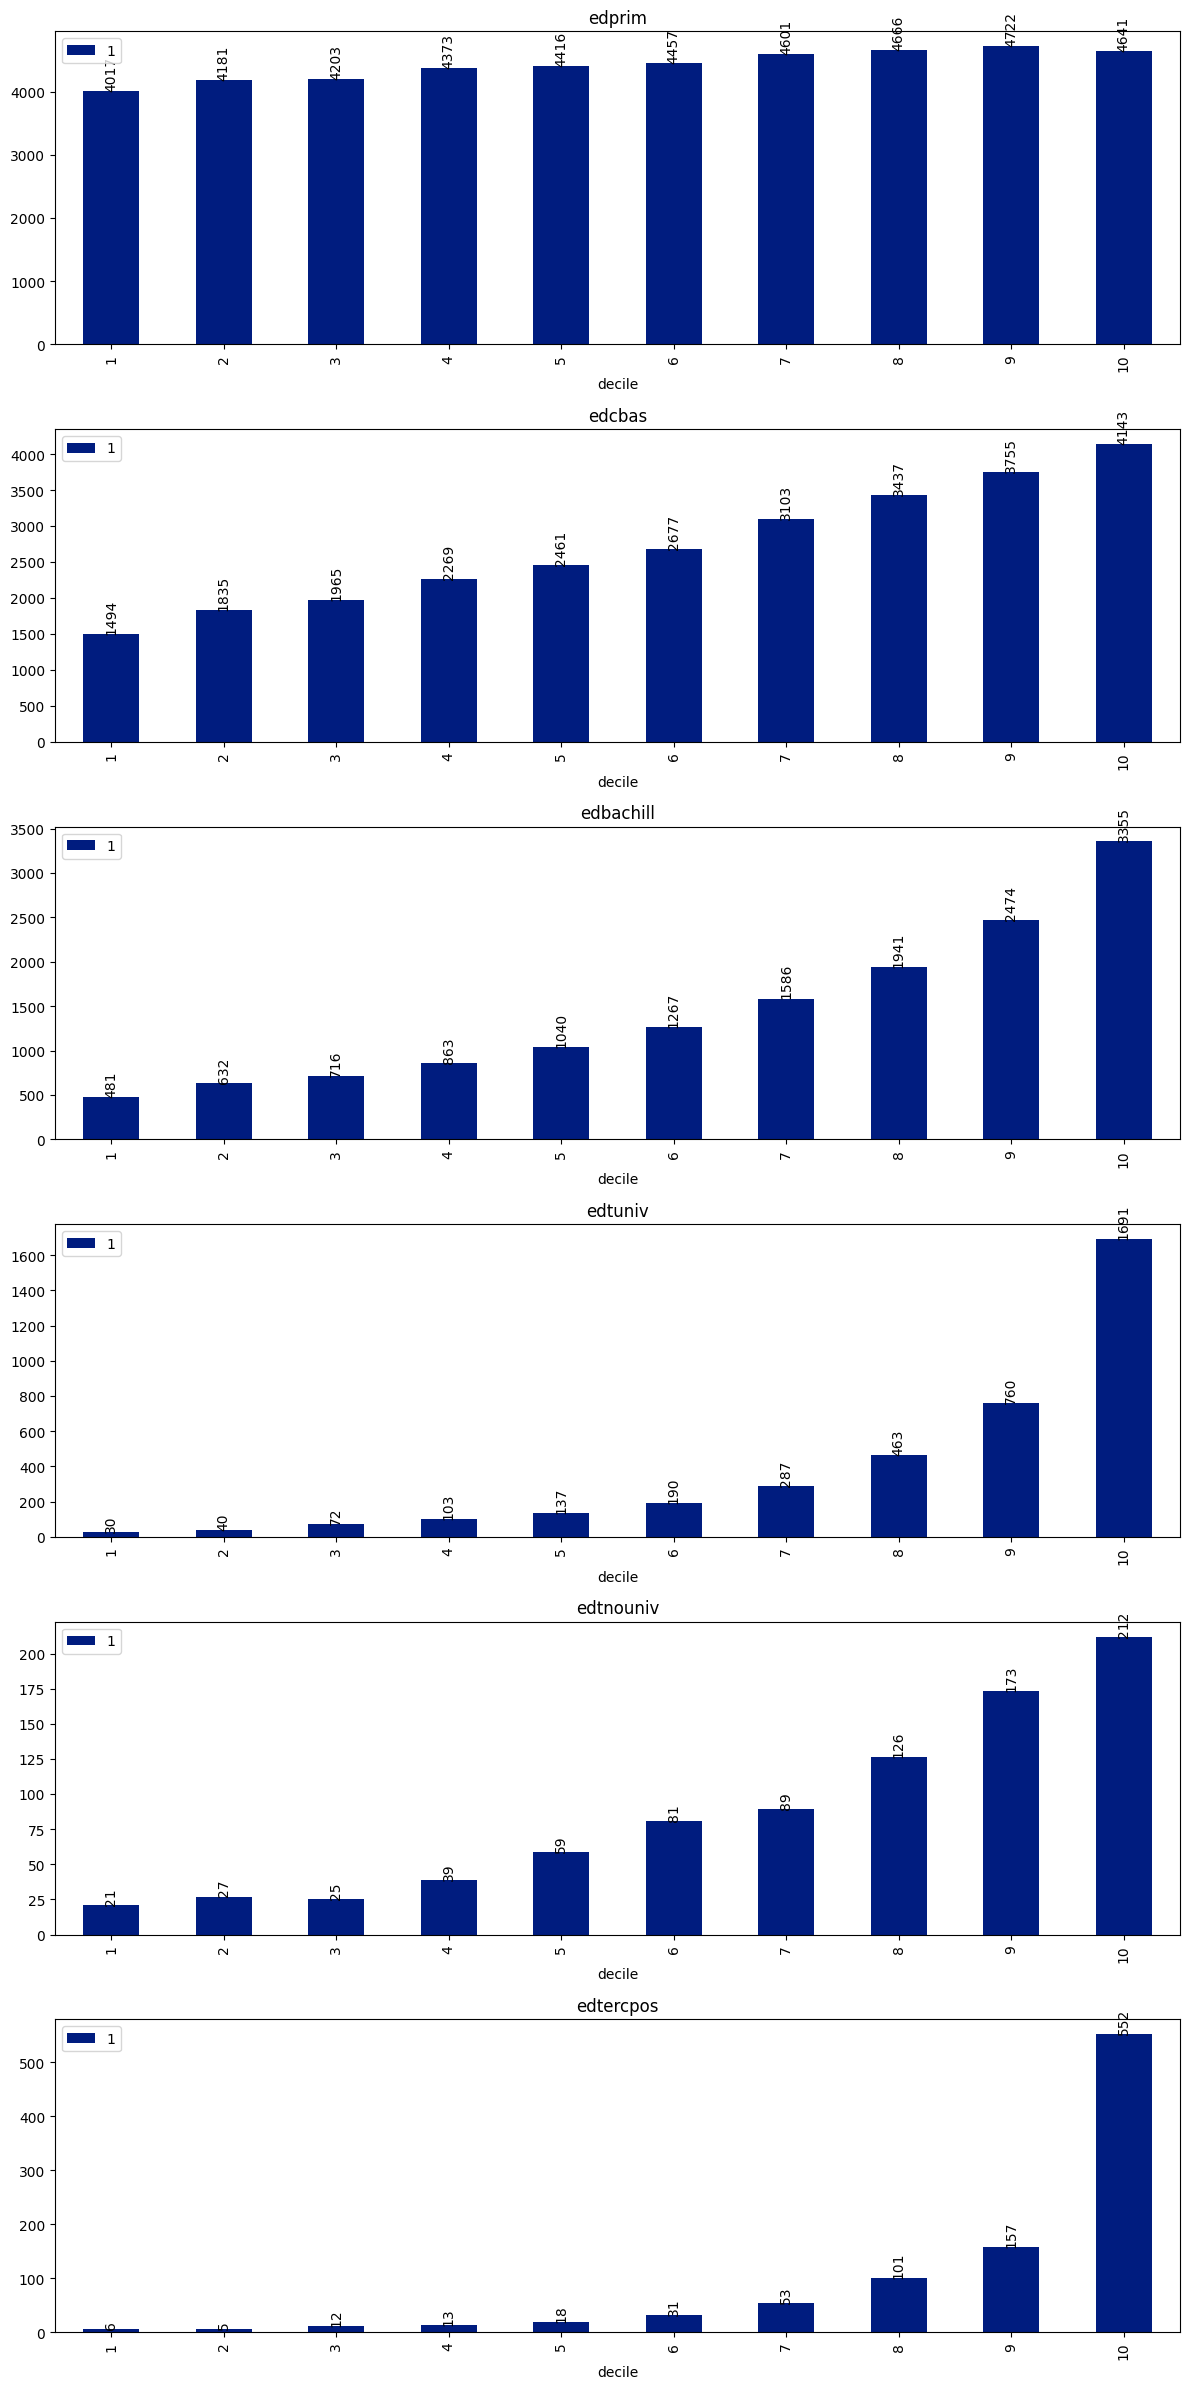

In [286]:
# First we define the list of columns to analyze, in this case we need to know the number of homes that achives each education level.
ed_cols = ['edprim', 'edcbas', 'edbachill', 'edtuniv', 'edtnouniv', 'edtercpos']

def plot_grouped_counts(df, cols, groupby_col, values):
    
    data_list = []
    
    for col in cols:
        mask = df[col].isin(values)
        filtered_df = df[mask]
        data = filtered_df.groupby([groupby_col, col])['ID'].count().unstack()
        
        if not data.empty:
            data_list.append((col, data))
    
    fig, axs = plt.subplots(nrows=len(data_list), figsize=(12, 4*len(data_list)))
    
    for i, (col, data) in enumerate(data_list):
        data.plot(kind='bar', ax=axs[i], title=col)
        
        for container in axs[i].containers:
            axs[i].bar_label(container, label_type='edge', rotation=90)
        axs[i].set_ylim(bottom=0)
        axs[i].legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

plot_grouped_counts(df_ed, ed_cols, 'decile', [1])


In these graphs we can see how as we move up in educational levels there are fewer and fewer households in the lower deciles and more households accumulate in the higher deciles. We can infer that there is a positive relationship between the level of education attained in the household and the level of household income.

### We define variables referring to food and livelihood by decile:

In this section we choose as relevant variables to analyze: expenditure on food, expenditure on housing, expenditure on transportation, expenditure on health, expenditure on children's education and the number of children.

We will generate a new subset of data for this analysis:

In [287]:
# We define a subset of data for expenses:
df_g = pd.DataFrame(
    dfch,
    columns= [
        'ID',
        'nper',
        'anio',
        'mes',
        'nom_dpto',
        'decile',
        'ht11',
        'eg_ps3',
        'eg_ps4',
        'eg_ps5',
        'eg_ps6',
        'eg_ps7',
        'eg_ps8',
        'e186_2'
    ]
)

# We define the new names
g_columns = [
    'ID',
    'nper',
    'year',
    'month',
    'dept_name',
    'decile',
    'income',
    'g_alim',
    'g_viv',
    'g_vest',
    'g_transp',
    'g_salud',
    'g_ed_hijos',
    'cant_h'
]

# We define the old names
columns= [
    'ID',
    'nper',
    'anio',
    'mes',
    'nom_dpto',
    'decile',
    'ht11',
    'eg_ps3',
    'eg_ps4',
    'eg_ps5',
    'eg_ps6',
    'eg_ps7',
    'eg_ps8',
    'e186_2'
]

# Create a dictionary that maps the old and new names:
column_mapping = dict(zip(columns, g_columns))

# We rename the columns of the data subset:
df_g= df_g.rename(columns=column_mapping)

df_g.head()

,ID,nper,year,month,dept_name,decile,income,g_alim,g_viv,g_vest,g_transp,g_salud,g_ed_hijos,cant_h
0,11558,1,2022,1,MONTEVIDEO,4,63189.480000,2,2,2,2,2,4,0
1,11559,1,2022,1,MONTEVIDEO,9,150378.960000,2,2,2,2,2,4,0
2,11559,2,2022,1,MONTEVIDEO,9,150378.960000,2,2,2,2,2,4,0
3,11560,1,2022,1,MONTEVIDEO,10,198606.146667,2,2,2,2,2,4,0
4,11561,1,2022,1,MONTEVIDEO,8,113189.480000,3,3,3,2,3,4,0


We will begin by looking at how the number of children is distributed by decile, our intention is to analyze in which households the greatest number of children accumulates:

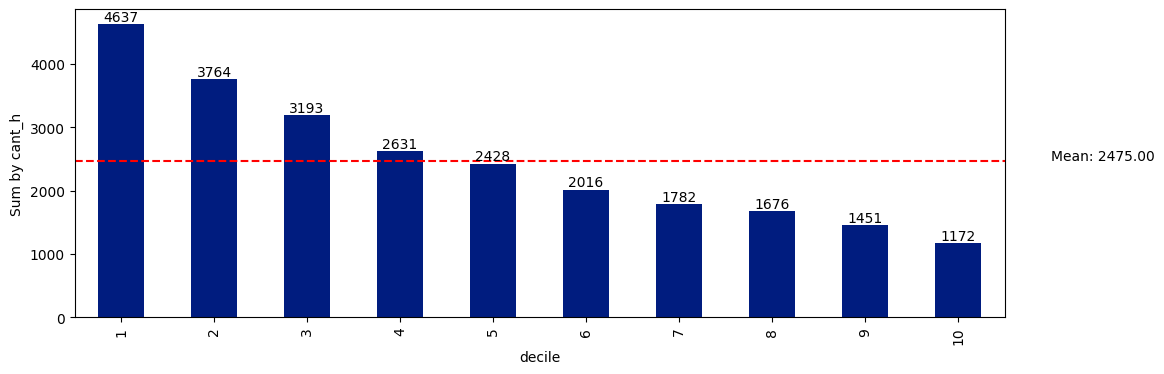

In [288]:
# As we have done before, we create a function similar to 'plot_average' but in this case we ned to sum the number of son's on each household.

# We set the graph configuration:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.figsize"] = (12, 4)

def plot_sum(df, col, variable):
    
    # This function taks for arguments a dataframe, the name of the column/variable were we need calculate and plot the sum and a column with deciles or segments to plot and group the mean.
    
    df[col] = df[col].astype(float)
    df_decile = df.groupby(variable)[col].sum().round()
    
    ax = df_decile.plot.bar()
    ax.axhline(df_decile.mean(), color='r', linestyle='--')
    
    for i in ax.containers:
        ax.bar_label(i)
    mean_value = df_decile.mean()
    
    plt.text(len(df_decile), mean_value, f'Mean: {mean_value:.2f}')
    plt.xlabel(variable)
    plt.ylabel(f'Sum by {col}')
    plt.show()

plot_sum(df_g, 'cant_h', 'decile')

As we can see, the lowest deciles have the highest concentration of children in households, while in the highest deciles the number of children in the household decreases to less than a quarter. In other words, for every child in a household in the highest decile, there can be up to 4 children in a household in the lowest decile.

To delve a little deeper into the situation of households by decile, in the next code we will see how the coverage of the main expenditure items behaves in households in the different deciles:

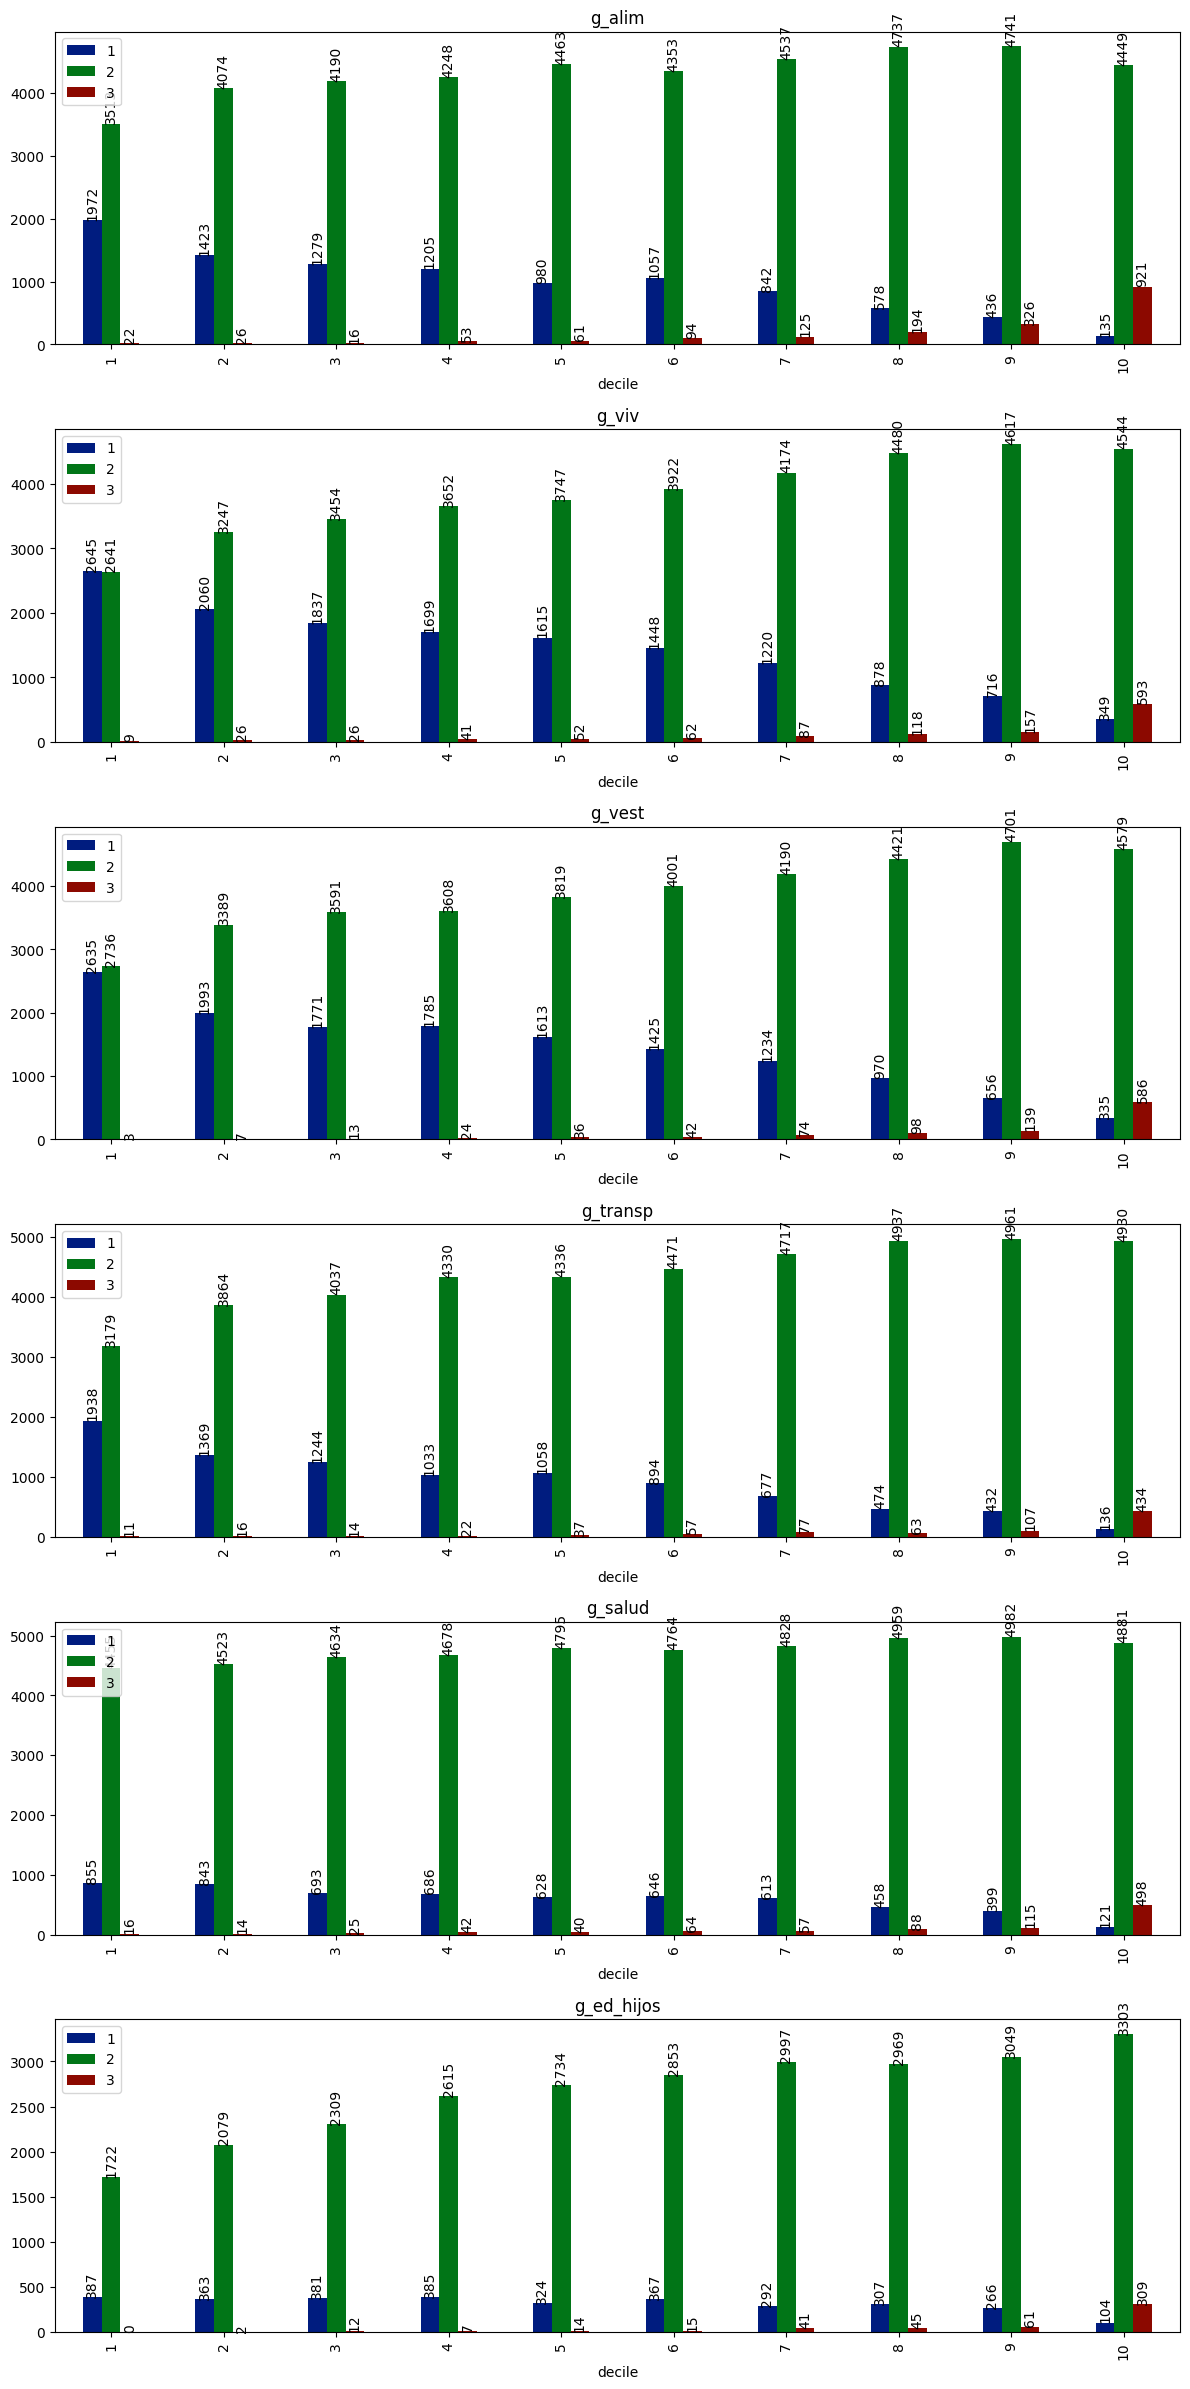

In [289]:
g_cols = ['g_alim', 'g_viv', 'g_vest', 'g_transp', 'g_salud', 'g_ed_hijos']

plot_grouped_counts(df_g, g_cols, 'decile', [1, 2, 3])

In the sub-charts, you can compare the 3 possibilities of coverage of the expenses we took for the analysis: 1 == insufficient coverage, 2 == sufficient coverage and 3 == more than sufficient. The colors help to distinguish each of them and allow for easier comparison.

As we can see, in the lower deciles, the number of households that has "insufficient spending" is higher. If we look the plot on inverse way  by the "more than sufficient" value of the variables, the graphs would look the other way around (higher household counts in the highest deciles).

What is interesting is to see what happens when the variables that we were selected takes the values 1 and 3 since there is an inverse relationship between the starting decile and the coverage of the expenditure in question. If we analyze the variables equal to 1 we find that there is a greater number of households in the lower deciles that do not reach sufficient coverage of the expenditure variables we chose for the analysis, but that as we move up the decile the insufficient coverage (in terms of household count) decreases. This behavior happens in reverse if we analyze the variables when they took the value 3.